In [1]:
using Plots, LaTeXStrings, LinearAlgebra 
#using Symbolics
using MTH229

In [2]:
#@variables u
#Du = Differential(u)

In [3]:
# 1.- MÉTODO DE PICARD

57-element Vector{Float64}:
  0.3
  0.6596708488843632
  1.3708297231098427
  2.651085442113431
  4.710348211622038
  7.633863042710973
 11.287779890927515
 15.337221896275528
 19.37428768315308
 23.060171813516476
 26.19848649069412
 28.731307201518298
 30.695318775577327
  ⋮
 35.99995460125817
 35.999968220872994
 35.999977754607315
 35.999984428223264
 35.99998909975537
 35.999992369828306
 35.999994658879594
 35.99999626121561
 35.99999738285087
 35.99999816799558
 35.999998717596895
 35.999999102317815

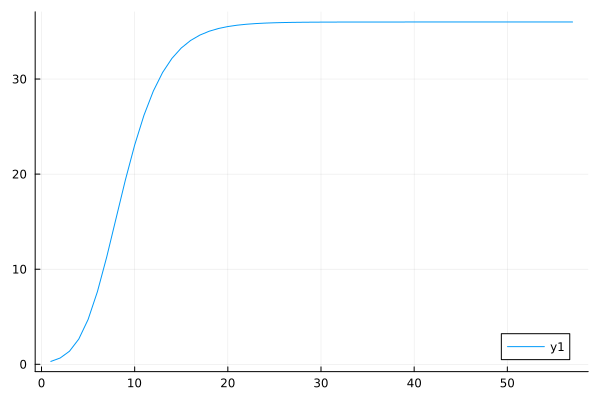

In [4]:
begin
    R = 10
    u⁰ = 0.3
    ϵ = 1.0e-8
    itmax = 1000
    K(u) = (4+sqrt(u)) / u
    U = Array{Float64}([u⁰])
    k = 2
    while k < itmax
        U = [U; (R / K(U[k-1]))] # Agregamos U[k] al vector U
        res = K(U[k]) * U[k] - R # Calculamos el residuo
        ((abs(U[k]-U[k-1]) <= ϵ * abs(U[k])) || (abs(res) <= ϵ * R)) ? break : k += 1 
    end
    display(U)
    plot(U)
end

8-element Vector{Float64}:
  0.3
  6.272670690061993
 23.781689715192464
 34.73807890181179
 35.98874318048524
 35.99999911989026
 35.99999999999999
 35.99999999999999

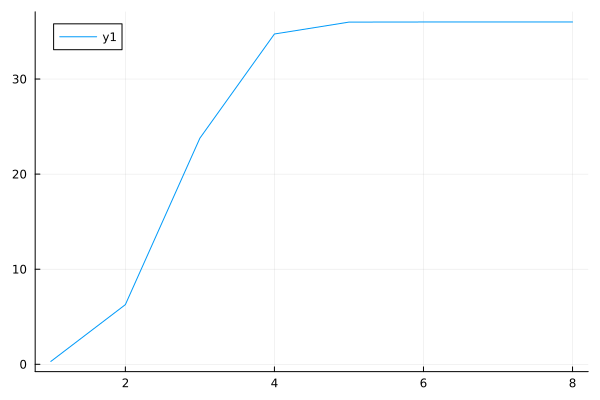

In [5]:
# 2.- MÉTODO DE NEWTON-RAPHSON
begin
    
    Kteo(U) = (4 + sqrt(U)) / U
    KTteo(U) = 1 / (2 * sqrt(U))
    
    U⁰ = 0.3
    R = 10
    ϵ = 1.0e-8
    itmax = 1000
    
    U = Array{Float64}([U⁰])    
    F = Array{Float64}([Kteo(U[1]) * U[1]])
    ΔU = Array{Float64}([(R - F[1]) / KTteo(U[1])])
    
    i = 2
    while i < itmax 
        ΔU = [ΔU; (R - F[i-1]) / KTteo(U[i-1])]
        U = [U; U[i-1] + ΔU[i]]
        
        (abs(U[i]-U[i-1]) <= ϵ * abs(U[i])) ? break : i += 1
        F = [F; Kteo(U[i-1]) * U[i-1]]
    end
    display(U)
    plot(U)
end

9-element Vector{Float64}:
  0.3
  6.272670690061993
 10.101766189232658
 28.03816473951317
 32.51892250112671
 35.911515464461715
 35.99566491964619
 35.99999986948574
 35.99999999999215

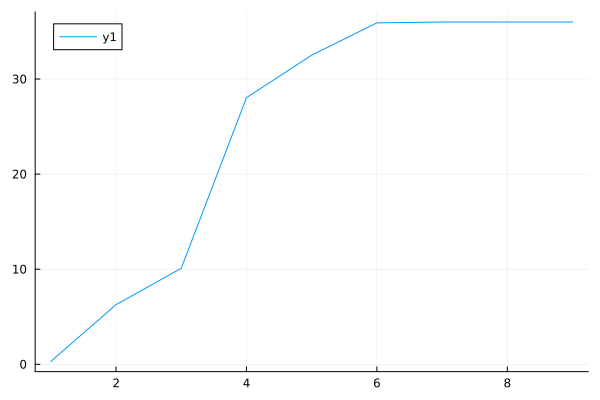

In [6]:
# 3.a- MÉTODO DE NEWTON-RAPHSON MODIFICADO (Calculo de KT cada 2 iteraciones)

begin
    Kteo(U) = (4 + sqrt(U)) / U
    KTteo(U) = 1 / (2 * sqrt(U))
    
    U⁰ = 0.3
    R = 10
    ϵ = 1.0e-8
    itmax = 1000
    
    U = Array{Float64}([U⁰])    
    F = Array{Float64}([Kteo(U[1]) * U[1]])
    ΔU = Array{Float64}([(R - F[1]) / KTteo(U[1])])    
    KT = Array{Float64}([KTteo(U⁰)])
    
    i = 2
    it = Array([])
    for j in 2:2:50
         it = [it; j]
       end
    
    while i < itmax     
        if (i in it) KT = KTteo(U[i-1]) end
        
        ΔU = [ΔU; (R - F[i-1]) / KT]
        U = [U; U[i-1] + ΔU[i]]
        
        (abs(U[i]-U[i-1]) <= ϵ * abs(U[i])) ? break : i += 1 
        F = [F; Kteo(U[i-1]) * U[i-1]]
    end
    display(U)
    plot(U)
end

12-element Vector{Float64}:
  0.3
  6.272670690061993
 10.101766189232658
 28.03816473951317
 32.51892250112671
 34.40979540999241
 35.26167421202749
 35.996175085660134
 35.99996067468202
 35.99999959465907
 35.999999995821874
 35.99999999999999

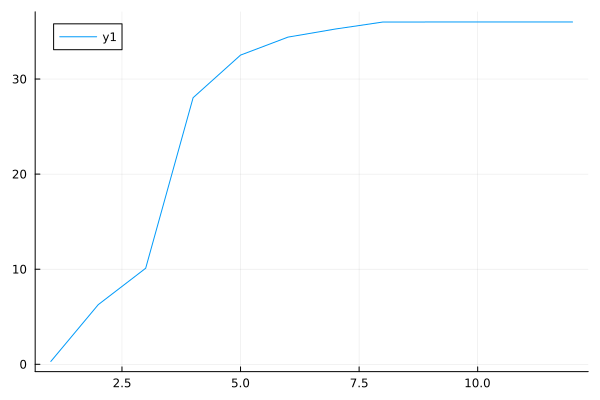

In [7]:
# 3.b- MÉTODO DE NEWTON-RAPHSON MODIFICADO (Calculo de KT cada 4 iteraciones)

begin
    Kteo(U) = (4 + sqrt(U)) / U
    KTteo(U) = 1 / (2 * sqrt(U))
    
    U⁰ = 0.3
    R = 10
    ϵ = 1.0e-8
    itmax = 1000
    
    U = Array{Float64}([U⁰])    
    F = Array{Float64}([Kteo(U[1]) * U[1]])
    ΔU = Array{Float64}([(R - F[1]) / KTteo(U[1])])    
    KT = Array{Float64}([KTteo(U⁰)])
    
    i = 2
    
   it = Array([])
    for j in 4:4:50
         it = [it; j]
       end
    
    while i < itmax         
        if (i in it) KT = KTteo(U[i-1]) end
    
        ΔU = [ΔU; (R - F[i-1]) / KT]
        U = [U; U[i-1] + ΔU[i]]
        
        (abs(U[i]-U[i-1]) <= ϵ * abs(U[i])) ? break : i += 1 
        F = [F; Kteo(U[i-1]) * U[i-1]]
    end
    display(U)
    plot(U)
end

17-element Vector{Float64}:
  0.3
  6.272670690061993
 10.101766189232658
 13.192753460734142
 15.786567009243932
 18.006780874581214
 19.930996224479397
 33.64197696466733
 35.42622103765181
 35.85486705073915
 35.962965048130556
 35.99052870124423
 35.99757646530316
 35.99937977286654
 35.999841266681926
 35.999999999825015
 36.0

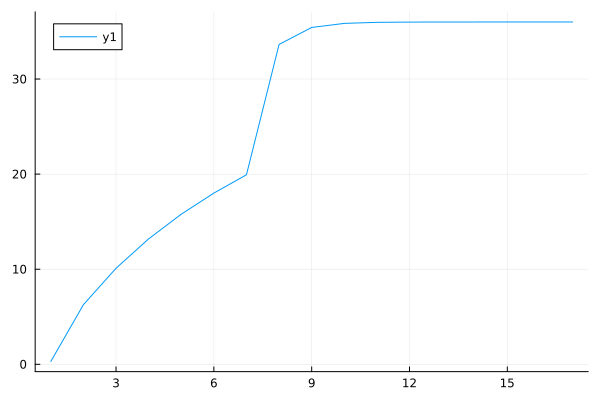

In [8]:
# 3.c- MÉTODO DE NEWTON-RAPHSON MODIFICADO (Calculo de KT cada 8 iteraciones)
begin
    Kteo(U) = (4 + sqrt(U)) / U
    KTteo(U) = 1 / (2 * sqrt(U))
    
    U⁰ = 0.3
    R = 10
    ϵ = 1.0e-8
    itmax = 1000
    
    U = Array{Float64}([U⁰])    
    F = Array{Float64}([Kteo(U[1]) * U[1]])
    ΔU = Array{Float64}([(R - F[1]) / KTteo(U[1])])    
    KT = Array{Float64}([KTteo(U⁰)])
    
    i = 2
    it = Array([])
    for j in 8:8:50
         it = [it; j]
       end
    
    while i < itmax         
        if (i in it) KT = KTteo(U[i-1]) end
    
        ΔU = [ΔU; (R - F[i-1]) / KT]
        U = [U; U[i-1] + ΔU[i]]
        
        (abs(U[i]-U[i-1]) <= ϵ * abs(U[i])) ? break : i += 1 
        F = [F; Kteo(U[i-1]) * U[i-1]]
    end
    display(U)
    plot(U)
end

30-element Vector{Float64}:
  0.3
  3.2863353450309964
 10.876951430484365
 19.78813410853679
 26.690313372220352
 30.997601220093348
 33.40529365120684
 34.67838767075895
 35.33301510128059
 35.66494838978603
 35.83208258017245
 35.915943157408634
 35.95794701685165
  ⋮
 35.99934254406375
 35.999671270530996
 35.99983563489028
 35.99991781735134
 35.99995890865221
 35.99997945432025
 35.999989727158656
 35.99999486357895
 35.99999743178939
 35.99999871589467
 35.99999935794733
 35.99999967897367

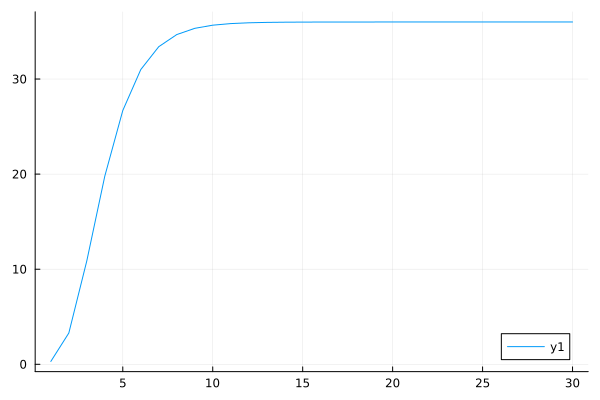

In [9]:
# 4.- MÉTODO DE NEWTON-RAPHSON CON RELAJACIÓN
begin
    
    Kteo(U) = (4 + sqrt(U)) / U
    KTteo(U) = 1 / (2 * sqrt(U))
    
    U⁰ = 0.3
    R = 10
    ϵ = 1.0e-8
    λ = 0.5
    itmax = 1000
    
    U = Array{Float64}([U⁰])    
    F = Array{Float64}([Kteo(U[1]) * U[1]])
    ΔU = Array{Float64}([(R - F[1]) / KTteo(U[1])])
    
    i = 2
    while i < itmax 
        ΔU = [ΔU; λ * (R - F[i-1]) / KTteo(U[i-1])]
        U = [U; U[i-1] + ΔU[i]]
        
        (abs(U[i]-U[i-1]) <= ϵ * abs(U[i])) ? break : i += 1
        F = [F; Kteo(U[i-1]) * U[i-1]]
    end
    display(U)
    plot(U)
end

30-element Vector{Float64}:
  0.3
  3.2863353450309964
 10.876951430484365
 19.78813410853679
 26.690313372220352
 30.997601220093348
 33.40529365120684
 34.67838767075895
 35.33301510128059
 35.66494838978603
 35.83208258017245
 35.915943157408634
 35.95794701685165
  ⋮
 35.99934254406375
 35.999671270530996
 35.99983563489028
 35.99991781735134
 35.99995890865221
 35.99997945432025
 35.999989727158656
 35.99999486357895
 35.99999743178939
 35.99999871589467
 35.99999935794733
 35.99999967897367

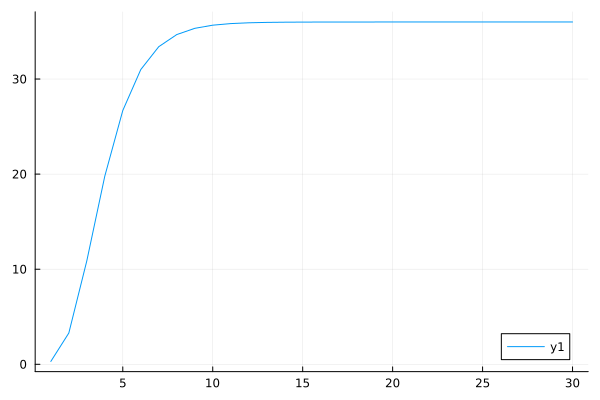

In [10]:
# 5.- MÉTODO BFSG

begin
    
    Kteo(U) = (4 + sqrt(U)) / U
    KTteo(U) = 1 / (2 * sqrt(U))
    
    U⁰ = 0.3
    R = 10
    ϵ = 1.0e-8
    λ = 0.5
    itmax = 1000
    
    U = Array{Float64}([U⁰])    
    F = Array{Float64}([Kteo(U[1]) * U[1]])
    ΔU = Array{Float64}([(R - F[1]) / KTteo(U[1])])
    
    i = 2
    while i < itmax 
        ΔU = [ΔU; λ * (R - F[i-1]) / KTteo(U[i-1])]
        U = [U; U[i-1] + ΔU[i]]
        
        (abs(U[i]-U[i-1]) <= ϵ * abs(U[i])) ? break : i += 1
        F = [F; Kteo(U[i-1]) * U[i-1]]
    end
    display(U)
    plot(U)
end